In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [3]:
consumer_key = 'YNyiyE5ibJ86TbhBDoFCpEsBu'
consumer_secret = 'cE63ZCAiiNBYogYUNwjwGgB2jOVBxvZkkPOfwm7SPMa6Eocb6V'
access_token = '748789075-E190Pda4cc7GQr4KQyUczGy9QtoMMPiSEkEm5uKP'
access_token_secret = 'aAlExkHR84ij1SQpw3wZpsBg1WCNxYv5yUWchyDHya8YN'

In [4]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [37]:
cursor = tw.Cursor(api.user_timeline, id = 'RahulGandhi', tweet_mode = "extended", lang='en').items(1000)

In [38]:
tweets = [{'Tweet':tweet.full_text} for tweet in cursor]
print(tweets)

Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected p

[{'Tweet': 'त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता हो रही है। हिंदू के नाम पर नफ़रत व हिंसा करने वाले हिंदू नहीं, ढोंगी हैं।\n\nसरकार कब तक अंधी-बहरी होने का नाटक करती रहेगी?  \n\n#TripuraRiots'}, {'Tweet': 'ये किस ऐंगल से अच्छे दिन हैं? \n\n#TaxExtortion #FuelPrice https://t.co/DAhxsyRpic'}, {'Tweet': 'भारत माता- देश की अन्नदाता- को कुचला गया है। ये क्रूरता और नफ़रत हमारे देश को खोखला कर रही है।\n\nमेरी शोक संवेदनाएँ।\n\n#FarmersProtest https://t.co/hgvfMviEfi'}, {'Tweet': '#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का हम स्वागत करते हैं। \n\nबात राजनीति की नहीं है- ये देश के लोकतांत्रिक ढाँचे पर, जनता पर व आज़ादी पर हमला है।\nये हमला करने का निर्देश सिर्फ़ दो ही लोग दे सकते हैं और जब सच सामने आएगा उनके पास कोई जवाब नहीं होगा।'}, {'Tweet': 'Live: My interaction with the press regarding the threat to national privacy by GOI’s Pegasus spying. https://t.co/dRiBrQynWk'}, {'Tweet': 'श्री सुब्बा रावजी के दुःखद निधन पर मेरी विनम्र श्रद्धांजलि।\nवे गांधीवादी विचारधारा के जननायक रहे व चंब

In [7]:
df_tweet = pd.DataFrame.from_dict(tweets)
df_tweet.head()

,Tweet
0,त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता ह...
1,ये किस ऐंगल से अच्छे दिन हैं? \n\n#TaxExtortio...
2,भारत माता- देश की अन्नदाता- को कुचला गया है। य...
3,#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का ह...
4,Live: My interaction with the press regarding ...


In [8]:

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob



In [9]:
stop_words = stopwords.words('english')
custom_stopwords = ['RT','aoc','amp']

In [10]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_tweet.head()

,Tweet
0,त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता ह...
1,ये किस ऐंगल से अच्छे दिन हैं? #TaxExtortion #F...
2,भारत माता- देश की अन्नदाता- को कुचला गया है। य...
3,#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का ह...
4,Live: My interaction press regarding threat na...


In [11]:
df1 = df_tweet.to_string()

df_split = df1.split()

df_split

all_sentences = []

for word in df_split:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [12]:
#print(lines)

In [13]:
import re

In [14]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        word = word.lower()
        lines2.append(word)
            

In [15]:
# #This is stemming the words to their root
# from nltk.stem.snowball import SnowballStemmer

# # The Snowball Stemmer requires that you pass a language parameter
# s_stemmer = SnowballStemmer(language='english')

# stem = []
# for word in lines2:
#     stem.append(s_stemmer.stem(word))
    
# #stem

In [16]:
#Removing all Stop Words

stem2 = []

stem = lines2 # Remove this if you want stemming

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [17]:
df_count = pd.DataFrame(stem2)

df_count = df_count[0].value_counts()

In [18]:
df_count.head()

pm       36
india    31
goi      27
modi     25
amp      24
Name: 0, dtype: int64

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

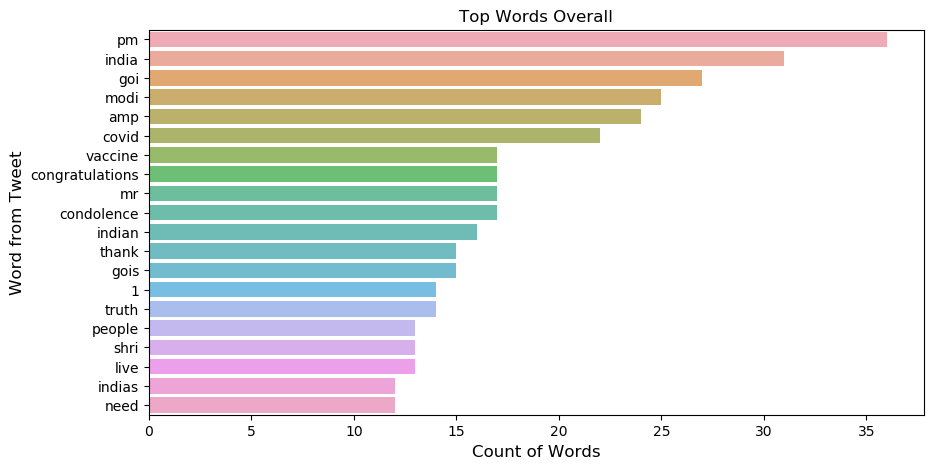

In [20]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df_count = df_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [21]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [22]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [23]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

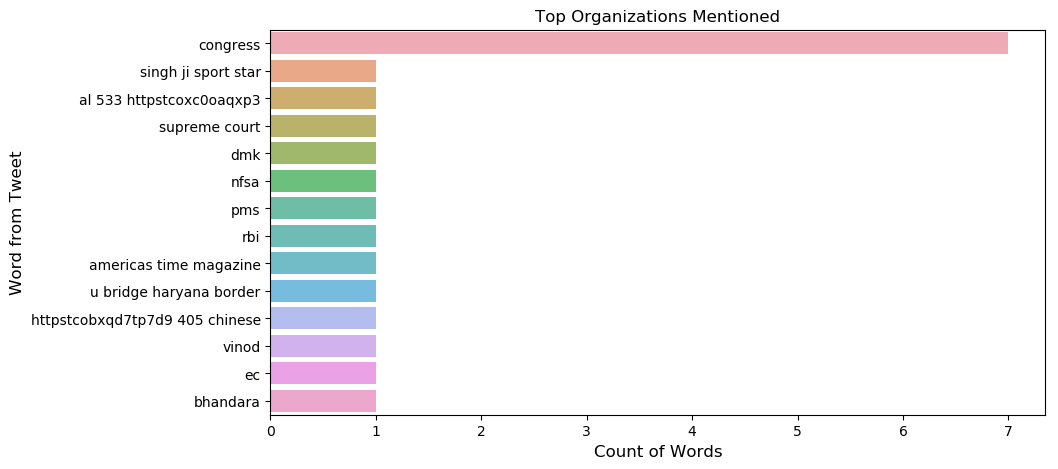

In [24]:
df_count = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [25]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

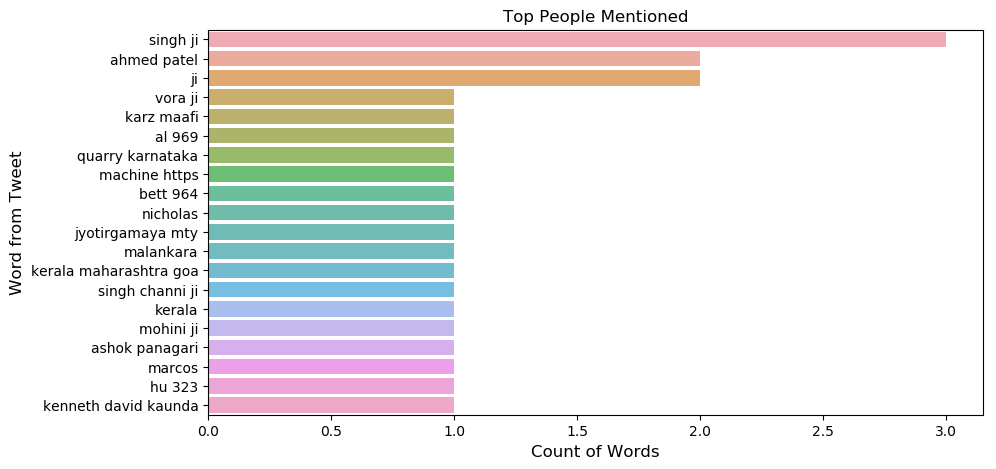

In [26]:
df_count = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [27]:
df_tweet.head()

,Tweet
0,त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता ह...
1,ये किस ऐंगल से अच्छे दिन हैं? #TaxExtortion #F...
2,भारत माता- देश की अन्नदाता- को कुचला गया है। य...
3,#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का ह...
4,Live: My interaction press regarding threat na...


In [28]:
df_tweet['polarity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweet['subjectivity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [29]:
df_tweet.head()

,Tweet,polarity,subjectivity
0,त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता ह...,0.000000,0.0
1,ये किस ऐंगल से अच्छे दिन हैं? #TaxExtortion #F...,0.000000,0.0
2,भारत माता- देश की अन्नदाता- को कुचला गया है। य...,0.000000,0.0
3,#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का ह...,0.000000,0.0
4,Live: My interaction press regarding threat na...,0.136364,0.5


In [30]:
def getAnalysis(score):
    if score < 0:
        return '‘Negative’'
    elif score == 0:
        return '‘Neutral’'
    else:
        return '‘Positive’'
df_tweet['TextBlob_Analysis'] = df_tweet['polarity'].apply(getAnalysis)

In [31]:
df_tweet.head()

,Tweet,polarity,subjectivity,TextBlob_Analysis
0,त्रिपुरा में हमारे मुसलमान भाइयों पर क्रूरता ह...,0.000000,0.0,‘Neutral’
1,ये किस ऐंगल से अच्छे दिन हैं? #TaxExtortion #F...,0.000000,0.0,‘Neutral’
2,भारत माता- देश की अन्नदाता- को कुचला गया है। य...,0.000000,0.0,‘Neutral’
3,#Pegasus मामले में सुप्रीम कोर्ट के ऑर्डर का ह...,0.000000,0.0,‘Neutral’
4,Live: My interaction press regarding threat na...,0.136364,0.5,‘Positive’


In [32]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Tweet                1000 non-null object
polarity             1000 non-null float64
subjectivity         1000 non-null float64
TextBlob_Analysis    1000 non-null object
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [33]:
df_tweet_count = df_tweet['TextBlob_Analysis'].value_counts()

In [34]:
df_tweet_count

‘Neutral’     707
‘Positive’    191
‘Negative’    102
Name: TextBlob_Analysis, dtype: int64

In [35]:
df_tweet['polarity'].mean()

0.03543816648629148

In [36]:
df_tweet['subjectivity'].mean()

0.16860890422077932

In [40]:
import GetOldTweets3 as got

In [42]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirus')\
                                       .setSince("2020-02-15")\
                                       .setUntil("2020-03-29")\
                                       .setLang('en')
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

An error occured during an HTTP request: HTTP Error 404: Not Found
Try to open in browser: https://twitter.com/search?q=Coronavirus%20since%3A2020-02-15%20until%3A2020-03-29&src=typd


SystemExit: 

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
